In [2]:
import pandas as pd
import numpy as np

In [11]:
"""Data points"""

from sklearn.datasets import make_blobs


n_samples = 300
x, _ = make_blobs(n_samples=n_samples, n_features=2, centers=1, cluster_std=1.0, random_state=42)
y = np.zeros(n_samples)

In [23]:
import math
from sklearn.neighbors import NearestNeighbors


#might have to redo this function: this is done with p=2 technically. It only calcukates the Euclidean distance 
def calculate_distances(x):
    dist = NearestNeighbors(n_neighbors=len(x)).fit(x) #this will calculate the distnac to each data point
    distances, _ = dist.kneighbors(x)
    
    AVGdistances = np.mean(distances, axis=1)
    
    return AVGdistances
        
        


def split_core_boundary(X, threshold):
    distances = calculate_distances(X)
    
    core_indices = np.where(distances <= threshold)[0]
    boundary_indices = np.where(distances > threshold)[0]
    
    core_points = X[core_indices]
    boundary_points = X[boundary_indices]
    
    return core_points, boundary_points

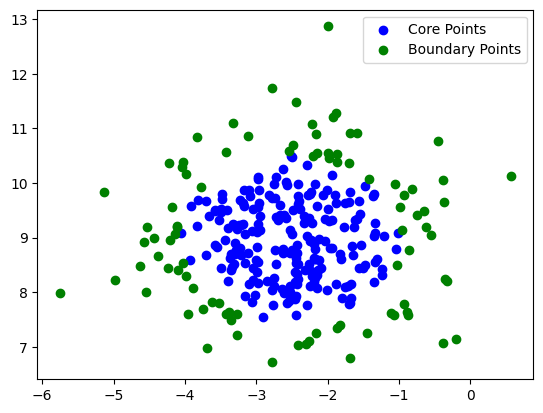

In [24]:
import matplotlib.pyplot as plt

core_threshold = np.percentile(calculate_distances(x), 70)  # Median threshold

core_points, boundary_points = split_core_boundary(x, core_threshold)

plt.scatter(core_points[:, 0], core_points[:, 1], c='blue', label='Core Points')
plt.scatter(boundary_points[:, 0], boundary_points[:, 1], c='green', label='Boundary Points')
plt.legend()
plt.show()